In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mtcars = pd.read_csv('./data/mtcars.csv')

## 데이터 개요

In [4]:
# data shape
mtcars.shape

(32, 12)

In [56]:
# data head
mtcars.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [7]:
# data info 
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [12]:
# data describe
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [13]:
mtcars.describe(include='object')

,model
count,32
unique,32
top,Mazda RX4
freq,1


In [15]:
# 결측치 탐지 
mtcars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [30]:
# 사분위수 
mpg_quantile = mtcars['mpg'].quantile([0.25, 0.50 ,0.75])
print(mpg_quantile)
print(f"3 사분위수 : {mpg_quantile[0.75]}")

0.25    15.425
0.50    19.200
0.75    22.800
Name: mpg, dtype: float64
3 사분위수 : 22.8


In [37]:
# 이상치 탐지 
def anomaly_detector(data, column:str, method:str='IQR') :

    # Inter Quantile Range, IQR를 이용한 이상치 탐지 
    if method == 'IQR':
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = abs(q3-q1)
        print(f'Q1 : {q1}')
        print(f'Q3 : {q3}')

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        print(f"anomalry range : {round(lower,3)} <= {column} <= {round(upper,3)}")
        cond1 = (data[column] > upper)
        cond2 = (data[column] < lower)

        anomaly_data = data[cond1 | cond2]

        return anomaly_data
    
anomaly_detector(mtcars, 'mpg') 

Q1 : 15.425
Q3 : 22.8
anomalry range : 4.363 <= mpg <= 33.862


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


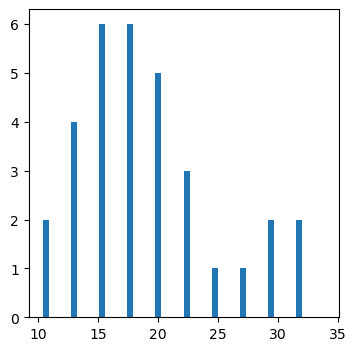

In [35]:
# mpg 분포 확인 
fig = plt.figure(figsize=(4,4))
ax = plt.hist(mtcars['mpg'], width=0.5)

<Axes: >

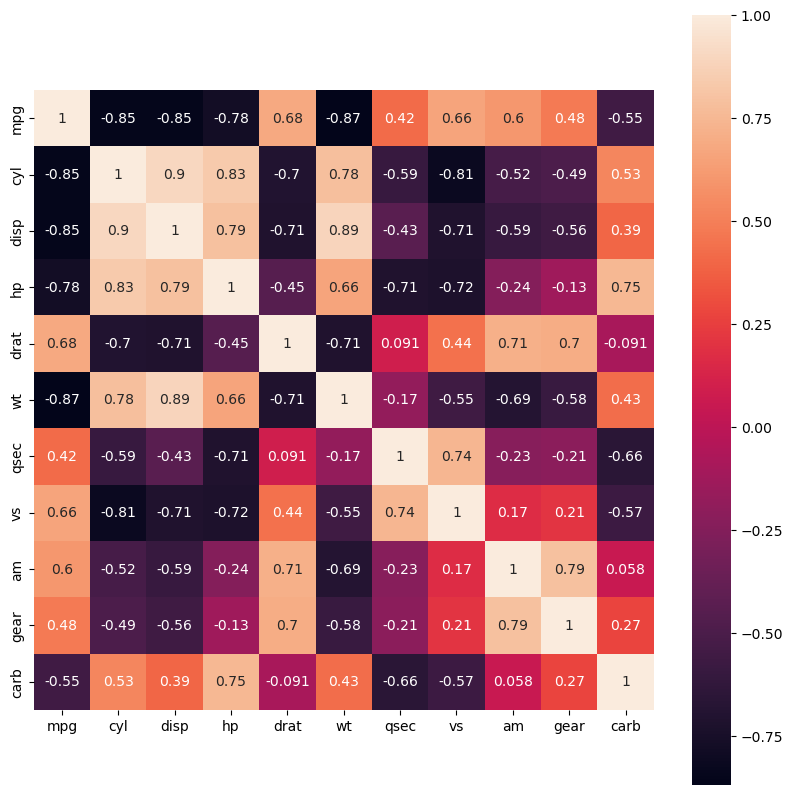

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(mtcars.drop(['model'], axis=1).corr(), annot=True, square=True)